<a href="https://colab.research.google.com/github/nehal35/Bike-sharing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Importing libraries & loading Dataset**

In [29]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# setting max display column limit to 20
pd.set_option("display.max_columns",20)
#set style 
plt.style.use('seaborn')
# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')

In [3]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:

# CSV file loaction path
file_path="/content/drive/MyDrive/Bike sharing demand prediction/Copy of SeoulBikeData.csv"

In [31]:
# reading csv file
bike_df=pd.read_csv(file_path,encoding="latin")

# **Reading dataset**

In [32]:
# lets see dataframe
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [33]:
# Check last 5 rows
bike_df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


## **copy of dataframe**

In [34]:
# creating copy of dataframe
bike_df_copy=bike_df.copy()

In [35]:
# printing all columns/features
bike_df_copy.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [36]:
# cheaking shape of dataframe
bike_df_copy.shape

(8760, 14)

# Our dataset have around 8,760 rows and 14 columns
# Statical summary of data

In [37]:
# statical summary
bike_df_copy.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [12]:
bike_df_copy.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


**From the statical summary we can check mean,maximum,minimum values of each feature**

# **Pre-Processing of data**
Preprocessing of data is important for highest accuracy of our model.before fitting our data to machine learning model ,it's important that data must be cleaned and also without outlier (if this not done then our model will never learn true pattern of data).If any particular model have some assumption then we also need to take care of these assumption before fitting our data to model . for example in linear regression we have some assumption like (multicollinearity,homodasticity,normally distribution).Let's start pre-processing of data so that we can get highest accuracy in predictions

Before going further it's important to understand about feature of our dataframe and also what type of data each columns contain



# **Checking info of dataframe**

In [38]:
# checking info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Most of the feature in our dataframe are numeric type and some are categorical type but "Date" column of our dataframe contain datetime type information but in given data set its data type is object so let's convert datatype of "Date" column. Now let's check for null value/missing value in each column. if there is any null value we will try to replace null value by mean,median or mode.if null value in any column is greater than fourty percent we will drop that particular column from dataset.Treatment of null value is important because it will make our analysis much stronger

In [39]:
#checking null values and sorting in descending order
bike_df_copy.isnull().sum().sort_values(ascending=True)


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Ohh ,that's great In our dataset there is no null / missing values

Till now we checked for null/missing value and also datatype of our dataframe columns,Now let's check for outlier.

For a particular feature outlier is basically either very less or either very extreme value compared to all other value to that feature.

Identification of potential outliers is important because ,An outlier may indicate bad data. For example, the data may have been puted incorrectly or an experiment may not have been run correctly.

# **Let's check for the outlier in our data**


In our dataframe we have some categorical features as well so i am just creating a list of features which are numeric outlier detection ,let's creat box plot for all numeric features

In [42]:
#creating list of numeric features
List_of_numerics=['Rented Bike Count','Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


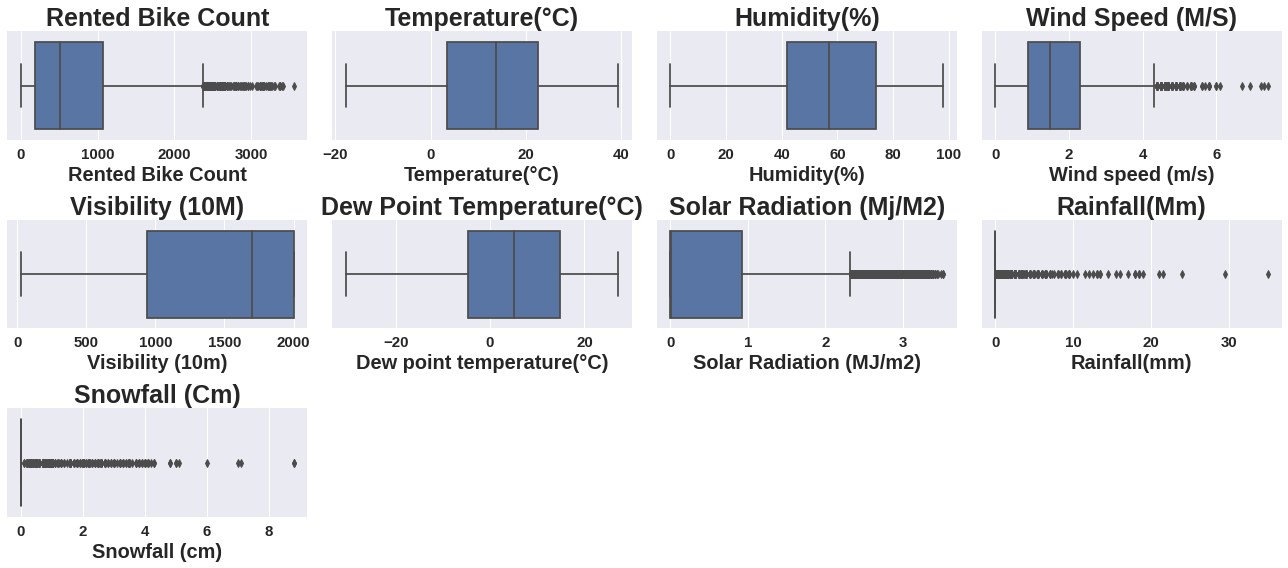

In [43]:
plt.figure(figsize=(18,8))
for n,column in enumerate(List_of_numerics):
  plt.subplot(3, 4, n+1)
  sns.boxplot(bike_df_copy[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [44]:
bike_df_copy.shape

(8760, 14)

In [46]:
bike_df_copy['Rented Bike Count'].max()

3556

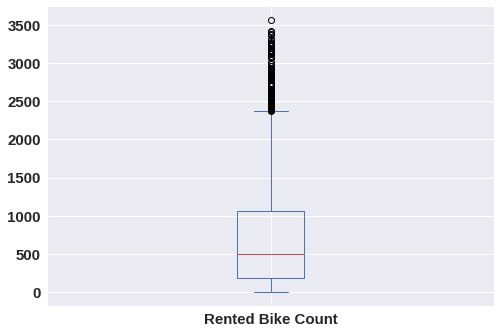

In [48]:
bike_df_copy['Rented Bike Count'].plot(kind='box')

In [51]:
# Finding Q1, Q3 and IQR
Q1 =  bike_df_copy['Rented Bike Count'].quantile(0.25) #25%
Q3 = bike_df_copy['Rented Bike Count'].quantile(0.75) # 75%
IQR = Q3 - Q1
print(IQR)

874.25


In [59]:
# The outlier values
bike_df_copy[(bike_df_copy['Rented Bike Count'] < Q1-1.5*IQR ) | (bike_df_copy['Rented Bike Count'] > Q3+1.5*IQR)]['Rented Bike Count']

2946    2401
2994    2402
3114    2401
3210    2404
3282    2692
        ... 
7746    2631
7818    2613
7842    2415
7866    2612
7890    2632
Name: Rented Bike Count, Length: 158, dtype: int64

In [61]:
# The outlier values
bike_df_copy[(bike_df_copy['Rented Bike Count'] < Q1-1.5*IQR ) | (bike_df_copy['Rented Bike Count'] > Q3+1.5*IQR)]['Rented Bike Count'].count()

158

In [63]:
# Remove outliers from our data set
outliers = (bike_df_copy['Rented Bike Count'] >= Q1 - 1.5 * IQR) & (bike_df_copy['Rented Bike Count'] <= Q3 + 1.5 *IQR)
bike_df_copy = bike_df_copy.loc[outliers] 

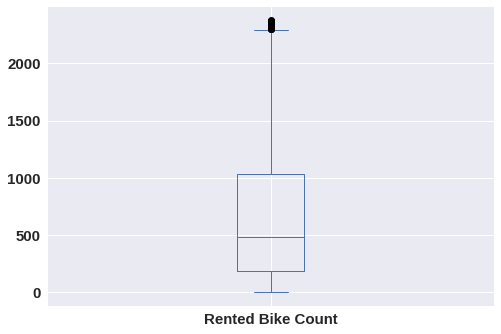

In [64]:
bike_df_copy['Rented Bike Count'].plot(kind='box')

In [65]:
bike_df_copy.shape

(8602, 14)

# **Converting date column to date time and extracting day,month and year**

In [66]:
#converting datatype of "Date" column
bike_df_copy['Date']=pd.to_datetime(bike_df_copy['Date'])

In [68]:
#creating three new column /extracting day,month,year from date column
bike_df_copy['day'] = bike_df_copy['Date'].dt.day
bike_df_copy['month'] = bike_df_copy['Date'].dt.month
bike_df_copy['year'] = bike_df_copy['Date'].dt.year
bike_df_copy['name_of_day'] = bike_df_copy.Date.dt.day_name()

In [69]:
bike_df_copy.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year,name_of_day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday


In [70]:
#dropping date column
bike_df_copy.drop('Date',axis=1,inplace=True)

In [72]:
#checking values count
bike_df_copy['Rented Bike Count'].value_counts().reset_index().head(-5)

,index,Rented Bike Count
0,0,295
1,122,19
2,262,19
3,223,19
4,165,18
...,...,...
2014,1439,1
2015,1879,1
2016,2320,1
2017,887,1



In our dataframe we have 295 rows where Rented bike count is 0 ,it's possiable becuase of non Functioning day.

# **Exploratory data analysis**
## **Distribution of features**
### **Numerical columns**

In [73]:
#creating list of numeric features
List_of_numerics=['Rented Bike Count','Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


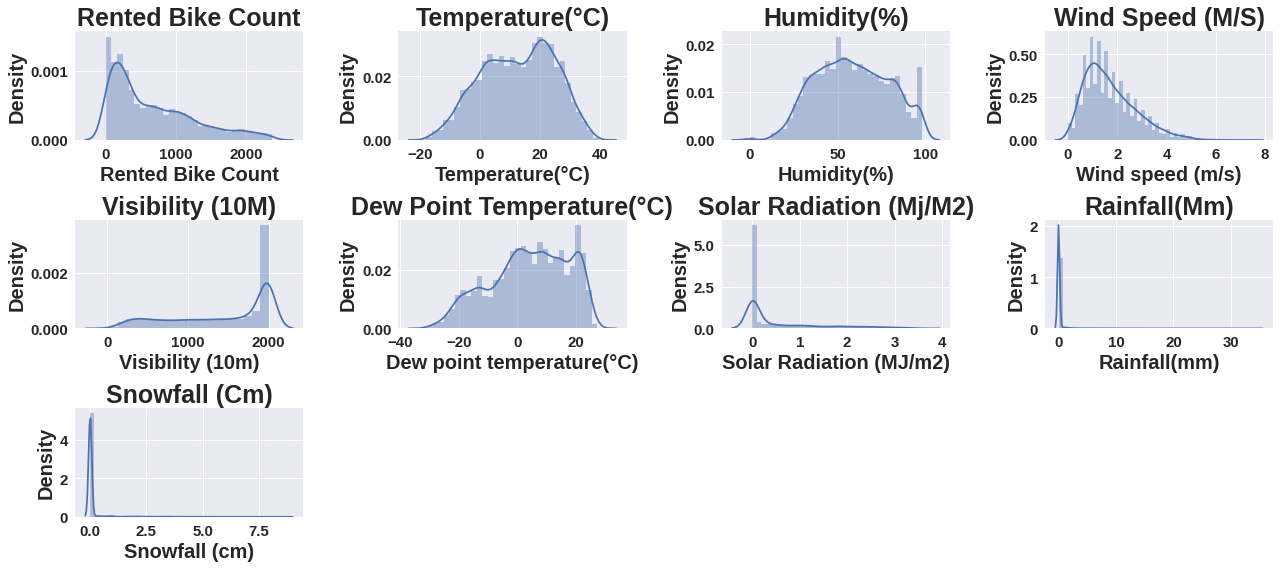

In [75]:
# Visualizing the distributions.
plt.figure(figsize=(18,8))
for n,column in enumerate(List_of_numerics):
  plt.subplot(3, 4, n+1)
  sns.distplot(bike_df_copy[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

# **insights**

From the above distribution ,we can say that:-
 1. In our dataset Weather condition feature like ( Tempreture,wind speed,rainfall ) are either normally or either uniform distributed (Not exactly)
 
2. Others columns are positively and neagtively skewd

# **Categorical columns**
**Seasonal trend (how demand of bike changes with season )**